### 1. Data Import and Data Summary

#### (a) Load the data xyz.csv into a pandas dataframe.

In [1]:
# import all the packages

import numpy as np
import pandas as pd


import sklearn.linear_model as lm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import os
%matplotlib inline
path= os.getcwd()
print(path)

C:\Users\Amit Manghwani\Desktop\INterview


In [2]:
df=pd.read_csv(r'C:\Users\Amit Manghwani\Desktop\INterview/BlackFriday.csv')
df=pd.DataFrame(df)

#### (b) It's time to get to know your data! Report the number of rows and columns in the dataset.
#### (c) What variables does this dataset have? Report the variable names along with the data type of each variable.

In [3]:
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
Cit

#### Please type the number of rows and columns.
#### Number of rows: 537577
#### Number of columns: 12

In [4]:
#to get a better understanding of the data for all the columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


### 2. Data Manipulation/ Exploratory Analyses

#### (a) What are the features included in the dataset?

#### Features are Age,Occupation,Gender, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1,
#### Product_Category_2, Product_Category_3, Purchase

#### I have not assumed Product_ID and User_ID as features.


In [5]:
#### (c) What is the distribution of purchase? Please create a visulization in support of your answer.

C:\Users\Amit Manghwani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

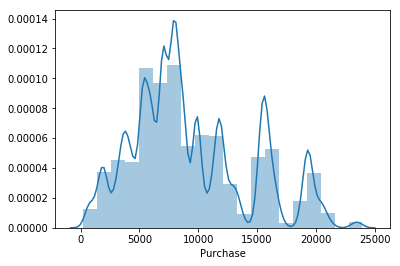

In [6]:
import seaborn as sns

sns.distplot(df.Purchase, bins=20)

df['Purchase'].describe()

### Mean purchase is around 9333 whereas median is around 8062 dollars. 

Text(0,0.5,'Count')

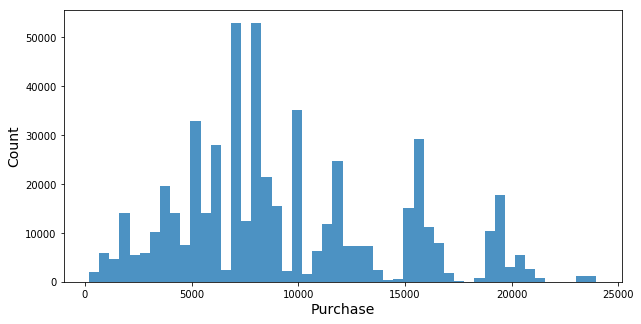

In [7]:
#Another way to plot distribution using matplotlib

plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)

### (d) What is the purchase by age by gender? Please create a visulization in support of your answer.

      Age Gender     Purchase
0    0-17      F  8444.703210
1    0-17      M  9312.322227
2   18-25      F  8405.430852
3   18-25      M  9506.501081
4   26-35      F  8791.798654
5   26-35      M  9470.621052
6   36-45      F  9046.573808
7   36-45      M  9517.126321
8   46-50      F  8929.448740
9   46-50      M  9429.151563
10  51-55      F  9131.451837
11  51-55      M  9789.020476
12    55+      F  9119.577196
13    55+      M  9557.058094


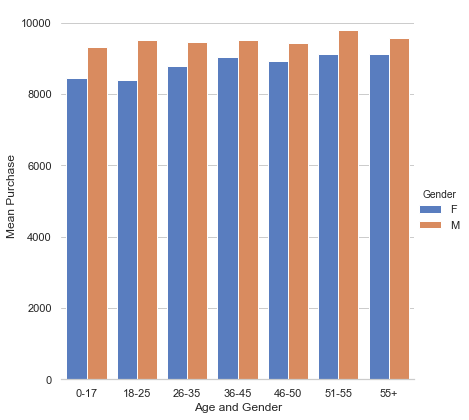

In [8]:

sns.set(style="whitegrid")
df_purchase_by_Gender = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
print(df_purchase_by_Gender)

# Plot of purchase by Gender by Age
plot_gender_age= sns.catplot(x="Age", y="Purchase", hue="Gender", data=df_purchase_by_Gender,
                height=6, kind="bar", palette="muted")
plot_gender_age.despine(left=True)
plot_gender_age.set_ylabels("Mean Purchase")
plot_gender_age.set_xlabels("Age and Gender")


#### Throughout all age groups it looks like males shop more than females. 
#### There is not much difference in the average purchase across age groups in both genders.

#### (e) What is the distribution of purchase per city per maritial status? Please create a visulization in support of your answer.

  City_Category  Marital_Status     Purchase
0             A               0  9021.237649
1             A               1  8855.717756
2             B               0  9192.249551
3             B               1  9207.978143
4             C               0  9830.386771
5             C               1  9862.775149


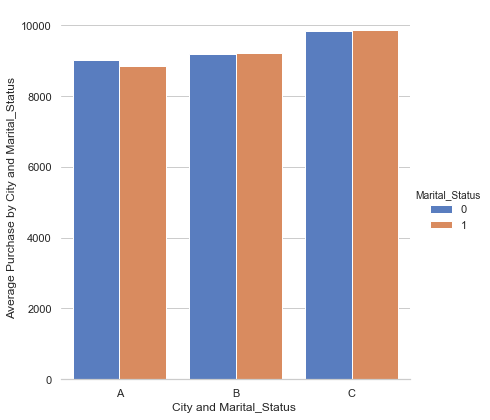

In [9]:
sns.set(style="whitegrid")
by_city_marital = df.groupby(['City_Category','Marital_Status']).agg({'Purchase':np.mean}).reset_index()
print(by_city_marital)

# Plot of purchase by Gender by Age
by_city_marital_plot= sns.catplot(x="City_Category", y="Purchase", hue="Marital_Status", data=by_city_marital,
                height=6, kind="bar", palette="muted")
by_city_marital_plot.despine(left=True)
#plot_gender_age.set_title("Purchase by City and Marital_Status ")
by_city_marital_plot.set_ylabels("Average Purchase by City and Marital_Status ")
by_city_marital_plot.set_xlabels("City and Marital_Status ")


#### City category C has the highest mean purchase among all the categories.

#### (f) What is the distribution of purchase per city per stay in current city? Please create a visulization in support of your answer.

In [10]:
# removing + from stay in City 
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [11]:
df.Stay_In_Current_City_Years = pd.Categorical(df.Stay_In_Current_City_Years)

   Stay_In_Current_City_Years City_Category     Purchase
0                         0.0             A  9028.710591
1                         0.0             B  8946.812564
2                         0.0             C  9900.145676
3                         1.0             A  8927.870743
4                         1.0             B  9225.205104
5                         1.0             C  9767.681720
6                         2.0             A  9014.848463
7                         2.0             B  9250.978676
8                         2.0             C  9900.361216
9                         3.0             A  8956.718849
10                        3.0             B  9231.433705
11                        3.0             C  9892.719685
12                        4.0             A  8880.110251
13                        4.0             B  9240.194353
14                        4.0             C  9855.517169


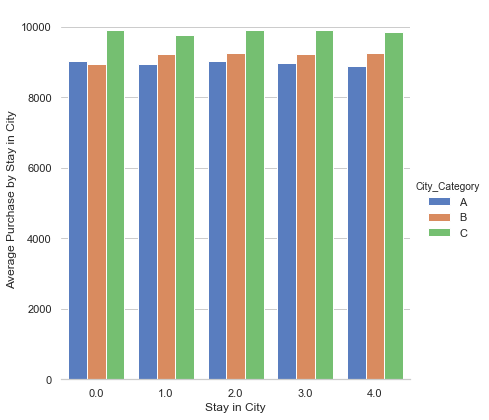

In [12]:
sns.set(style="whitegrid")
by_stay_in_city = df.groupby(['Stay_In_Current_City_Years','City_Category']).agg({'Purchase':np.mean}).reset_index()
print(by_stay_in_city)

# Plot 
plot= sns.catplot(x="Stay_In_Current_City_Years", y="Purchase", hue="City_Category", data=by_stay_in_city,
                height=6, kind="bar", palette="muted")
plot.despine(left=True)
#plot_gender_age.set_title("Purchase by City and Marital_Status ")
plot.set_ylabels("Average Purchase by Stay in City  ")
plot.set_xlabels("Stay in City")


### 3. Data Preparation

#### (a) Are there any missing values in the dataset?


In [13]:
len(df)

537577

In [14]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### Yes there are a lot of missing values in Product category 2 & 3.

In [15]:
print(df.corr())

                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023024        0.018732            0.003687   
Occupation         -0.023024    1.000000        0.024691           -0.008114   
Marital_Status      0.018732    0.024691        1.000000            0.020546   
Product_Category_1  0.003687   -0.008114        0.020546            1.000000   
Product_Category_2  0.001471   -0.000031        0.015116            0.540423   
Product_Category_3  0.004045    0.013452        0.019452            0.229490   
Purchase            0.005389    0.021104        0.000129           -0.314125   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001471            0.004045  0.005389  
Occupation                   -0.000031            0.013452  0.021104  
Marital_Status                0.015116            0.019452  0.000129  
Product_Category_1            0.540423            0.229490 -0.314125  
Prod

In [16]:
#running regression between purchase and Product_Category_2 to find if the R-square is high

m = smf.ols(formula = "Purchase ~ Product_Category_2", data=df)
f = m.fit()  # to estimate
print(f.summary())  # to print summary
print(f.predict())  # to compute predicted values

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 1.709e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:13:06   Log-Likelihood:            -3.6875e+06
No. Observations:              370591   AIC:                         7.375e+06
Df Residuals:                  370589   BIC:                         7.375e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.218e+04     18

#### Would drop Product_Category_3 as there are 60% missing values.
#### Product_Category_2 as30% data is missing and the correlation is low

#### (b) Please input the missing values by the best way possible.
### (c) Convert any string values to numeric for the model to interpret the features.

In [17]:
df.Gender = pd.Categorical(df.Gender)
df['Gender'] = df.Gender.cat.codes

df.City_Category = pd.Categorical(df.City_Category)
df['City_Category'] = df.City_Category.cat.codes

df.Age = pd.Categorical(df.Age)
df['Age'] = df.Age.cat.codes


In [18]:
#dropping columns that are not required in the model
df_model = df.drop(['User_ID', 'Product_ID','Product_Category_2','Product_Category_3'], axis=1)

In [19]:
df_model.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,0,10,0,2.0,0,3,8370
1,0,0,10,0,2.0,0,1,15200
2,0,0,10,0,2.0,0,12,1422
3,0,0,10,0,2.0,0,12,1057
4,1,6,16,2,4.0,0,8,7969


#### (d) Define X and Y matrices for modelling.

In [20]:
X = df_model.drop(['Purchase'],axis=1)
Y = df_model['Purchase']

#### (e) Perform one-hot encoding for all the categorical features which are not ordinal.

In [21]:
X = pd.get_dummies(X, columns=['Age'], drop_first=True, prefix='Age')
X = pd.get_dummies(X, columns=['Occupation'], drop_first=True, prefix='Occupation')
X = pd.get_dummies(X, columns=['City_Category'], drop_first=True, prefix='City_Category')
X = pd.get_dummies(X, columns=['Stay_In_Current_City_Years'], drop_first=True, prefix='Stay_In_Current_City_Years')


In [22]:
X.columns

Index(['Gender', 'Marital_Status', 'Product_Category_1', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Age_5', 'Age_6', 'Occupation_1', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6',
       'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10',
       'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14',
       'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18',
       'Occupation_19', 'Occupation_20', 'City_Category_1', 'City_Category_2',
       'Stay_In_Current_City_Years_1.0', 'Stay_In_Current_City_Years_2.0',
       'Stay_In_Current_City_Years_3.0', 'Stay_In_Current_City_Years_4.0'],
      dtype='object')

#### (f) Split the data into train and test set.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### (g) Scale the data using StandardScaler in sklearn

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=['Gender', 'Marital_Status', 'Product_Category_1',
        'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Age_6', 'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_1', 'City_Category_2', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'])



X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=['Gender', 'Marital_Status', 'Product_Category_1'
        , 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5',
       'Age_6', 'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
       'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
       'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
       'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
       'City_Category_1', 'City_Category_2', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'])


### 5. Regression Model
#### (a) Perform a basic binary classification to predict the purchase using Random Forest

#### As the purchase is continuous, I am using regressor and not classification model


In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0,n_estimators=200)

C:\Users\Amit Manghwani\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

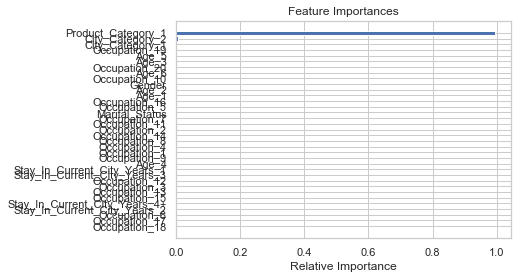

In [27]:
features = list(X_train.columns)
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#### Looks like only product_category_1 and City_category_2 have high importance. 
#### It would be interesting to see if I had filled the missing values by a different integer(since product is a category), 
#### then the feature importance results might have been high for product_category_2 and product_category_3 as well. 
#### 